### 1.1 LightGBM的介绍

LightGBM可以看作是XGBoost的升级豪华版，在获得与XGBoost近似精度的同时，又提供了更快的训练速度与更少的内存消耗。正如其名字中的Light所蕴含的那样，LightGBM在大规模数据集上跑起来更加优雅轻盈，一经推出便成为各种数据竞赛中刷榜夺冠的神兵利器。

LightGBM的主要优点：

1. 简单易用。提供了主流的Python\C++\R语言接口，用户可以轻松使用LightGBM建模并获得相当不错的效果。
2. 高效可扩展。在处理大规模数据集时高效迅速、高准确度，对内存等硬件资源要求不高。
3. 鲁棒性强。相较于深度学习模型不需要精细调参便能取得近似的效果。
4. LightGBM直接支持缺失值与类别特征，无需对数据额外进行特殊处理

LightGBM的主要缺点：

1. 相对于深度学习模型无法对时空位置建模，不能很好地捕获图像、语音、文本等高维数据。
2. 在拥有海量训练数据，并能找到合适的深度学习模型时，深度学习的精度可以遥遥领先LightGBM。

### 1.2 LightGBM的应用

LightGBM还被成功应用在工业界与学术界的各种问题中。例如金融风控、购买行为识别、交通流量预测、环境声音分类、基因分类、生物成分分析等诸多领域。虽然领域相关的数据分析和特性工程在这些解决方案中也发挥了重要作用，但学习者与实践者对LightGBM的一致选择表明了这一软件包的影响力与重要性。

### 2.1 学习目标

- 了解 LightGBM 的参数与相关知识
- 掌握 LightGBM 的Python调用并将其运用到英雄联盟游戏胜负预测数据集上

### 2.2 代码流程

Part1 基于英雄联盟数据集的LightGBM分类实践

- Step1: 库函数导入 
- Step2: 数据读取/载入 
- Step3: 数据信息简单查看 
- Step4: 可视化描述 
- Step5: 利用 LightGBM 进行训练与预测
- Step6: 利用 LightGBM 进行特征选择
- Step7: 通过调整参数获得更好的效果

### 2.3.1 基于英雄联盟数据集的LightGBM分类实战

In [1]:
#下载需要用到的数据集
!wget https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/8LightGBM/high_diamond_ranked_10min.csv

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


**Step1：函数库导入**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

现在共有9881场英雄联盟韩服钻石段位以上的排位比赛数据，数据提供了在十分钟时的游戏状态，包括击杀数、死亡数、金币数量、经验值、等级……等信息。列blueWins是数据的标签，代表了本场比赛是否为蓝队获胜。

数据的各个特征描述如下：

| 特征名称                 | 特征意义         | 取值范围 |   |   |
|--------------------------|------------------|----------|---|---|
|     WardsPlaced          | 插眼数量         | 整数     |   |   |
| WardsDestroyed           | 拆眼数量         | 整数     |   |   |
| FirstBlood               | 是否获得首次击杀 | 整数     |   |   |
| Kills                    | 击杀英雄数量     | 整数     |   |   |
| Deaths                   | 死亡数量         | 整数     |   |   |
| Assists                  | 助攻数量         | 整数     |   |   |
| EliteMonsters            | 击杀大型野怪数量 | 整数     |   |   |
| Dragons                  | 击杀史诗野怪数量 | 整数     |   |   |
| Heralds                  | 击杀峡谷先锋数量 | 整数     |   |   |
| TowersDestroyed          | 推塔数量         | 整数     |   |   |
| TotalGold                | 总经济           | 整数     |   |   |
| AvgLevel                 | 平均英雄等级     | 浮点数   |   |   |
| TotalExperience          | 英雄总经验       | 整数     |   |   |
| TotalMinionsKilled       | 英雄补兵数量     | 整数     |   |   |
| TotalJungleMinionsKilled | 英雄击杀野怪数量 | 整数     |   |   |
| GoldDiff                 | 经济差距         | 整数     |   |   |
| ExperienceDiff           | 经验差距         | 整数     |   |   |
| CSPerMin                 | 分均补刀         | 浮点数   |   |   |
| GoldPerMin               | 分均经济         | 浮点数   |   |   |

**Step2：数据读取/载入**

In [3]:
df = pd.read_csv('./data/high_diamond_ranked_10min.csv')
y = df['blueWins']

**Step3：数据信息简单查看**

In [4]:
df.info()
df.head()
df.tail()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [5]:
## 标注标签并利用value_counts函数查看训练集标签的数量
y.value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

数据集正负标签数量基本相同，不存在数据不平衡的问题。

In [6]:
## 标注特征列
drop_cols = ['gameId', 'blueWins']
x = df.drop(drop_cols, axis=1)

In [7]:
x.describe()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


- 我们发现不同对局中插眼数和拆眼数的取值范围存在明显差距，甚至有前十分钟插了250个眼的异常值。
- 我们发现EliteMonsters的取值相当于Deagons + Heralds。
- 我们发现TotalGold	等变量在大部分对局中差距不大。
- 我们发现两支队伍的经济差和经验差是相反数。
- 我们发现红队和蓝队拿到首次击杀的概率大概都是50%

In [8]:
## 根据上面的描述，我们可以去除一些重复变量，比如只要知道蓝队是否拿到一血，我们就知道红队有没有拿到，可以去除红队的相关冗余数据。
drop_cols = ['redFirstBlood', 'redKills', 'redDeaths', 
             'redGoldDiff', 'redExperienceDiff', 'blueCSPerMin', 
             'redCSPerMin', 'blueGoldPerMin', 'redGoldPerMin']
x.drop(drop_cols, axis=1, inplace=True)
x.head()

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,28,2,1,9,6,11,0,0,0,0,...,8,0,0,0,0,16567,6.8,17047,197,55
1,12,1,0,5,5,5,0,0,0,0,...,2,2,1,1,1,17620,6.8,17438,240,52
2,15,0,0,7,11,4,1,1,0,0,...,14,0,0,0,0,17285,6.8,17254,203,28
3,43,1,0,4,5,5,1,0,1,0,...,10,0,0,0,0,16478,7.0,17961,235,47
4,75,4,0,6,6,6,0,0,0,0,...,7,1,1,0,0,17404,7.0,18313,225,67


**Step4:可视化描述**

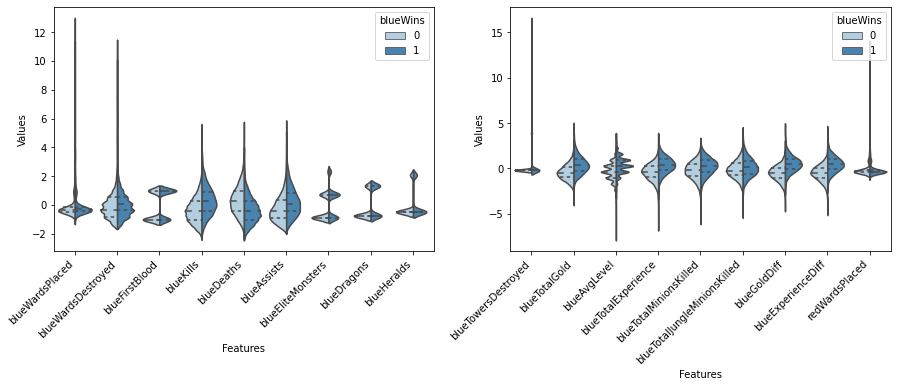

In [9]:
data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:9]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# 绘制小提琴图
sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True, inner='quart', ax=ax[0], palette='Blues')
fig.autofmt_xdate(rotation=45)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

sns.violinplot(x='Features', y='Values', hue='blueWins', data=data, split=True, inner='quart', ax=ax[1], palette='Blues')
fig.autofmt_xdate(rotation=45)
plt.show()

小提琴图 (Violin Plot)是用来展示多组数据的分布状态以及概率密度。这种图表结合了箱形图和密度图的特征，主要用来显示数据的分布形状。

从图中我们可以看出：

- 击杀英雄数量越多更容易赢，死亡数量越多越容易输（bluekills与bluedeaths左右的区别）。
- 助攻数量与击杀英雄数量形成的图形状类似，说明他们对游戏结果的影响差不多。
- 一血的取得情况与获胜有正相关，但是相关性不如击杀英雄数量明显。
- 经济差与经验差对于游戏胜负的影响较小。
- 击杀野怪数量对游戏胜负的影响并不大。

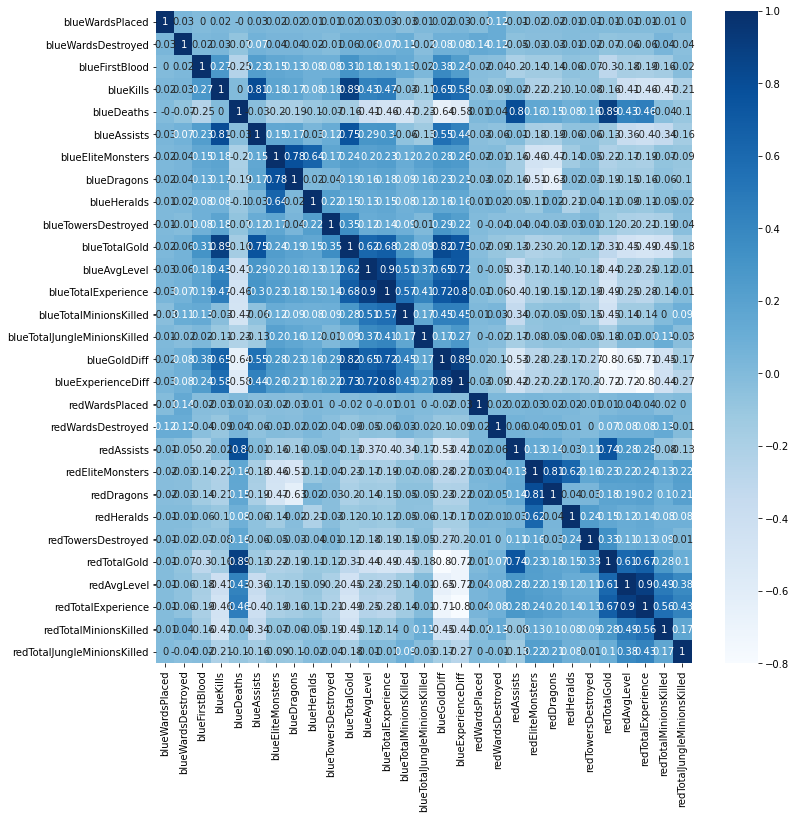

In [10]:
plt.figure(figsize=(12, 12))
sns.heatmap(round(x.corr(), 2), cmap='Blues', annot=True)
plt.show()

同时我们画出各个特征之间的相关性热力图，颜色越深代表特征之间相关性越强，我们剔除那些相关性较强的冗余特征。

In [11]:
# 去除冗余特征
drop_cols = ['redAvgLevel', 'blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)

d:\zhanghaibin\soft\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\zhanghaibin\soft\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\zhanghaibin\soft\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\zhanghaibin\soft\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


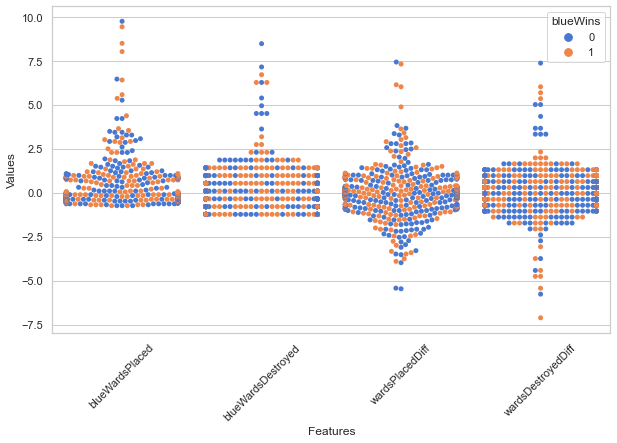

In [12]:
sns.set(style='whitegrid', palette='muted')

# 构造两个新特征
x['wardsPlacedDiff'] = x['blueWardsPlaced'] - x['redWardsPlaced']
x['wardsDestroyedDiff'] = x['blueWardsDestroyed'] - x['redWardsDestroyed']
data = x[['blueWardsPlaced', 'blueWardsDestroyed', 'wardsPlacedDiff', 'wardsDestroyedDiff']].sample(1000)

data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

我们画出了插眼数量的散点图，发现不存在插眼数量与游戏胜负间的显著规律。猜测由于钻石分段以上在哪插眼在哪好排眼都是套路，所以数据中前十分钟插眼数拔眼数对游戏的影响不大。所以我们暂时先把这些特征去掉。

In [13]:
## 去除和眼位相关的特征
drop_cols = ['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff',
            'wardsDestroyedDiff','redWardsPlaced','redWardsDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

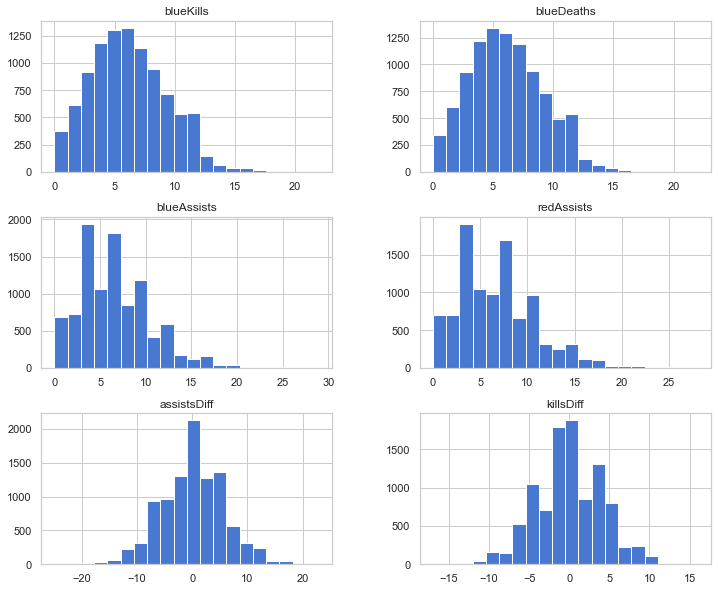

In [14]:
x['killsDiff'] = x['blueKills'] - x['blueDeaths']
x['assistsDiff'] = x['blueAssists'] - x['redAssists']
x[['blueKills', 'blueDeaths', 'blueAssists', 'redAssists', 'assistsDiff', 'killsDiff']].hist(figsize=(12, 10), bins=20)
plt.show()

我们发现击杀、死亡与助攻数的数据分布差别不大。但是击杀减去死亡、助攻减去死亡的分布与原分布差别很大，因此我们新构造这么两个特征。

d:\zhanghaibin\soft\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\zhanghaibin\soft\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\zhanghaibin\soft\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\zhanghaibin\soft\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\zhanghaibin\soft\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the p

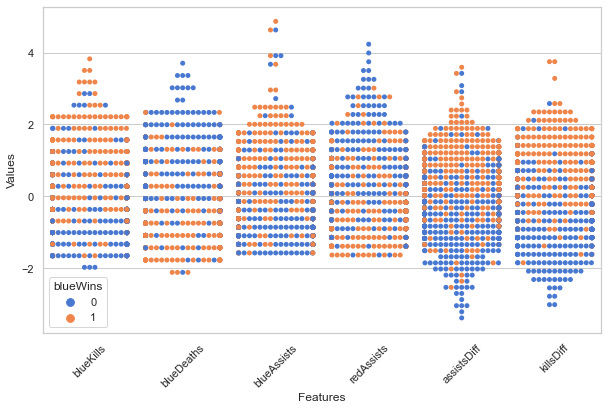

In [15]:
data = x[['blueKills', 'blueDeaths', 'blueAssists', 'redAssists', 'assistsDiff', 'killsDiff']].sample(1000)
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Features', y='Values', hue='blueWins', data=data)
plt.xticks(rotation=45)
plt.show()

从上图我们可以发现击杀数与死亡数与助攻数，以及我们构造的特征对数据都有较好的分类能力。

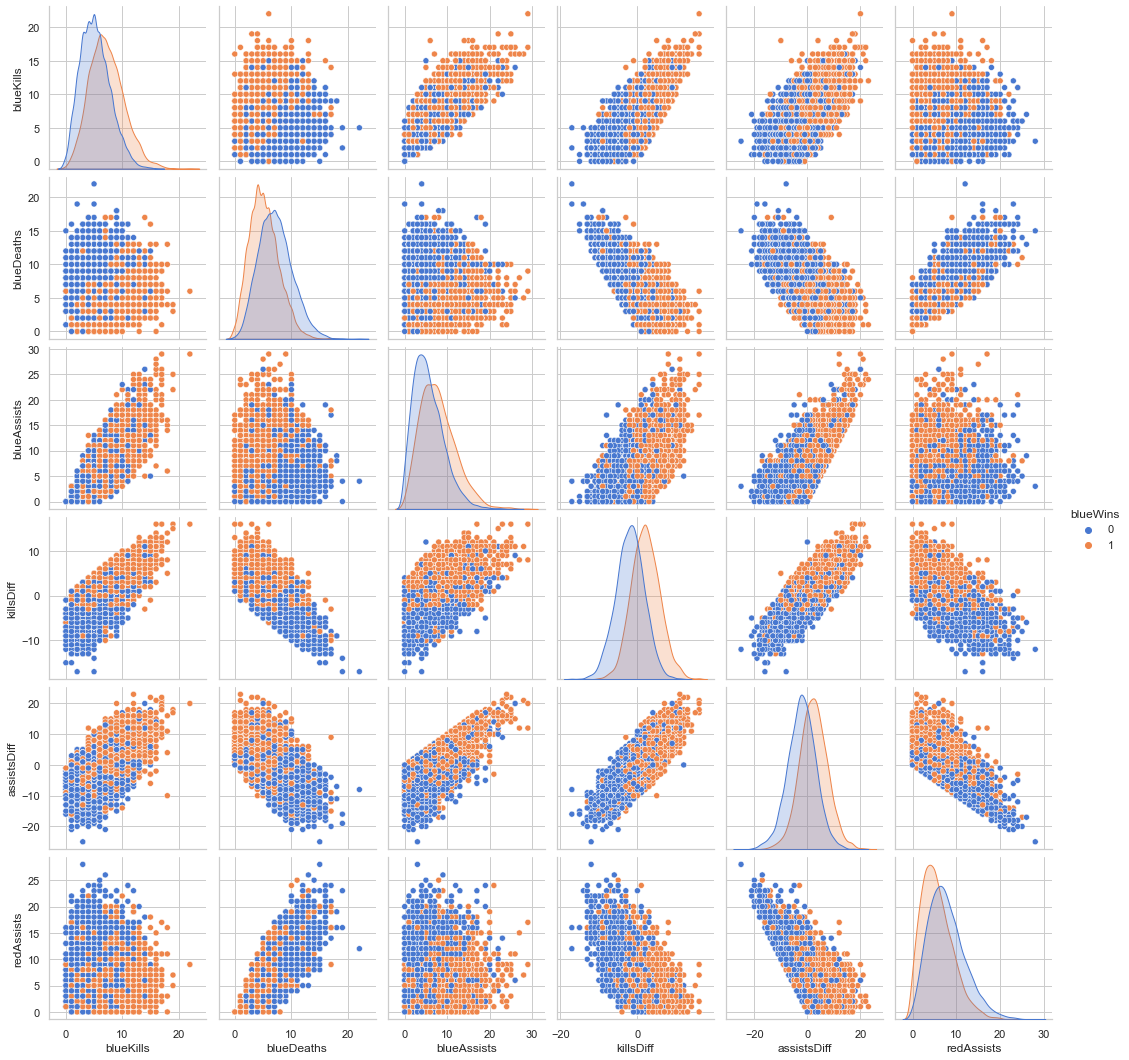

In [16]:
data = pd.concat([y, x], axis=1)
sns.pairplot(data, vars=['blueKills', 'blueDeaths', 'blueAssists', 'killsDiff', 'assistsDiff', 'redAssists'], hue='blueWins')
plt.show()

一些特征两两组合后对于数据的划分能力也有提升。

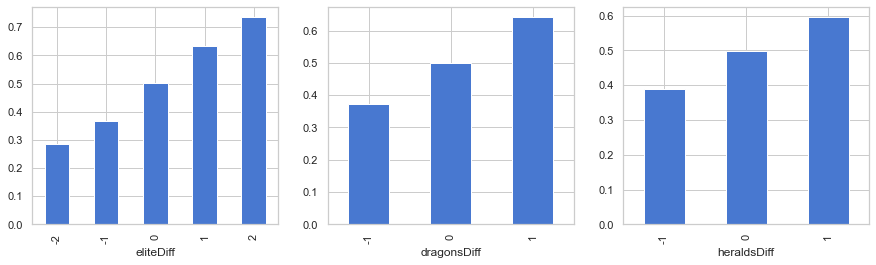

In [17]:
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']
data = pd.concat([y, x], axis=1)
eliteGroup = data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup = data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup = data.groupby(['heraldsDiff'])['blueWins'].mean()

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
eliteGroup.plot(kind='bar', ax=ax[0])
dragonGroup.plot(kind='bar', ax=ax[1])
heraldGroup.plot(kind='bar', ax=ax[2])
plt.show()

我们构造了两队之间是否拿到龙、是否拿到峡谷先锋、击杀大型野怪的数量差值，发现在游戏的前期拿到龙比拿到峡谷先锋更容易获得胜利。拿到大型野怪的数量和胜率也存在着强相关。

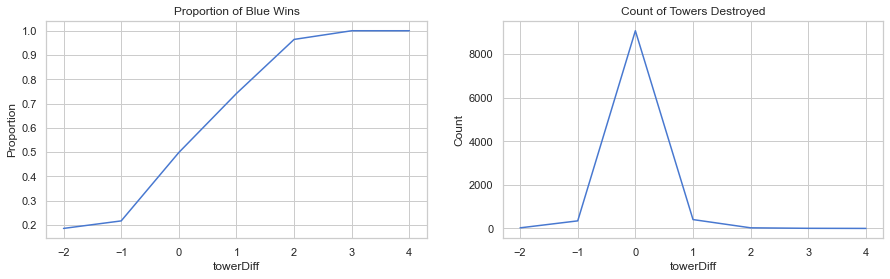

In [18]:
x['towerDiff'] = x['blueTowersDestroyed'] - x['redTowersDestroyed']
data = pd.concat([y, x], axis=1)
towerGroup = data.groupby(['towerDiff'])['blueWins']

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

towerGroup.mean().plot(kind='line', ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')

towerGroup.count().plot(kind='line', ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')
plt.show()

推塔是英雄联盟这个游戏的核心，因此推塔数量可能与游戏的胜负有很大关系。我们绘图发现，尽管前十分钟推掉第一座防御塔的概率很低，但是一旦某只队伍推掉第一座防御塔，获得游戏的胜率将大大增加。

**Step5：利用 LightGBM 进行训练与预测**

In [19]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = y
data_features_part = x

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size=0.2, random_state=2021)

In [20]:
## 安装lightgbm
# !pip install lightgbm

## 导入LightGBM模型
from lightgbm.sklearn import LGBMClassifier

## 定义 LightGBM 模型
clf = LGBMClassifier()

## 在训练集上训练LightGBM模型
clf.fit(x_train, y_train)

LGBMClassifier()

In [21]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)

TypeError: predict() missing 1 required positional argument: 'X'

1.8